In [46]:
import pandas as pd
import matplotlib.pyplot as plt


In [83]:
reservations = pd.read_csv("my_data_2024_full/reservations.csv")
room_reservations = pd.read_csv("my_data_2024_full/room_reservations.csv")
room_name = pd.read_csv("my_data_2024_full/room_name.csv")
customers_data = pd.read_csv("my_data_2024_full/customers_data.csv")
customers_reservations = pd.read_csv("my_data_2024_full/customers_reservations.csv")



# Diccionario para mapear los tipos de habitaciones a sus nombres
mapping = {
    15507: 'shared',
    15504: 'shared',
    15505: 'shared',
    23197: 'individual shared bathroom',
    15508: 'double shared bathroom',
    15509: 'double privated bathroom',
    15510: 'double privated bathroom e',
    23174: 'double e shared bathroom',
    23175: 'individual private bathroom',
    33902: 'TBC',
    68222: 'individual private bathroom e'
    
    
}

# Crear la nueva columna utilizando el diccionario
room_name['id_name_type'] = room_name['id_room_type'].map(mapping)

room_name['name'] = room_name['name'].replace('DEBP', '216')



reservations['created_date'] = pd.to_datetime(reservations['created_date'], format= '%d/%m/%Y')
reservations['status'] = pd.Categorical(reservations['status'])
reservations['channel'] = pd.Categorical(reservations['channel'])

print("reservations")
print(reservations)
print("\n\n\n")
print("room_reservations")

print(room_reservations)
print("\n\n\n")
print("customers_reservations")
print(customers_reservations)
print("\n\n\n")


print("room_name")
print(room_name)
print("\n\n\n")


reservations
            id             status  total_price            channel created_date
0     16677013          Confirmed    250123.95  HostelWorld Group   2024-01-01
1     16677252          Confirmed    101010.00        Booking.com   2024-01-01
2     16677341          Confirmed     38800.00        Booking.com   2024-01-01
3     16677460          Confirmed     86400.00                 --   2024-01-01
4     16678923  Cancelled: NoShow     90828.30  HostelWorld Group   2024-01-01
...        ...                ...          ...                ...          ...
4020  19795749          Confirmed    119387.78  HostelWorld Group   2024-08-22
4021  19795881          Confirmed    162756.00        Booking.com   2024-08-22
4022  19799254          Confirmed    352284.47  HostelWorld Group   2024-08-22
4023  19799893          Cancelled    273600.00        Booking.com   2024-08-22
4024  19801406          Confirmed    319200.00        Booking.com   2024-08-22

[4025 rows x 5 columns]




room_reser

In [48]:
## Tasa de ocupacion 
import pandas as pd


# Convertir las fechas a datetime
room_reservations['start_date'] = pd.to_datetime(room_reservations['start_date'], format= '%d/%m/%Y')
room_reservations['end_date'] = pd.to_datetime(room_reservations['end_date'], format= '%d/%m/%Y')

# Crear una columna con la fecha de inicio y fin de cada reserva
room_reservations['date'] = room_reservations.apply(lambda row: pd.date_range(row['start_date'], row['end_date']), axis=1)

room_reservations = room_reservations.explode('date')


# Contar el número de habitaciones ocupadas por día
daily_occupancy = room_reservations.groupby('date')['id_zak_room'].nunique()

# Calcular la tasa de ocupación por día
daily_occupancy_rate = (daily_occupancy / room_reservations['id_zak_room'].nunique()) * 100

print(daily_occupancy_rate)

date
2024-01-01     7.843137
2024-01-02    15.686275
2024-01-03    21.568627
2024-01-04    25.490196
2024-01-05    41.176471
                ...    
2025-07-20     1.960784
2025-07-21     1.960784
2025-07-22     1.960784
2025-07-25     1.960784
2025-07-26     1.960784
Name: id_zak_room, Length: 421, dtype: float64


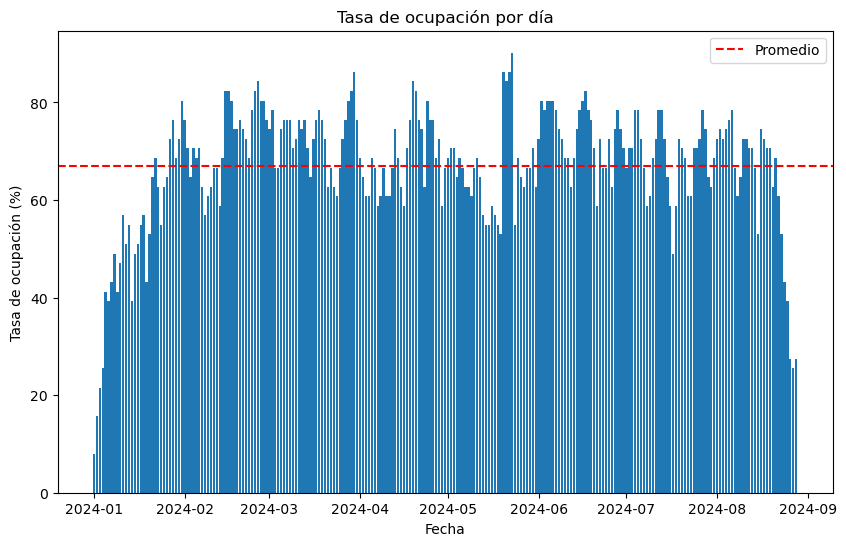

In [53]:
import matplotlib.pyplot as plt
import datetime

# Asignar la Serie daily_occupancy_rate a una variable
daily_occupancy_rate = (daily_occupancy / room_reservations['id_zak_room'].nunique()) * 100

# Filtrar la Serie daily_occupancy_rate por fecha menor a hoy
daily_occupancy_rate_filtered = daily_occupancy_rate[daily_occupancy_rate.index <= datetime.datetime.today()]



# Crear un gráfico de barras
plt.figure(figsize=(10, 6))
plt.bar(daily_occupancy_rate_filtered.index, daily_occupancy_rate_filtered.values)



# Calcular la tasa de ocupación promedio hasta la fecha actual
avg_occupancy_rate = daily_occupancy_rate_filtered.mean()

# Agregar una línea horizontal al gráfico
plt.axhline(y=avg_occupancy_rate, color='red', linestyle='--', label='Promedio')



plt.xlabel('Fecha')
plt.ylabel('Tasa de ocupación (%)')
plt.title('Tasa de ocupación por día')
plt.legend()
plt.show()


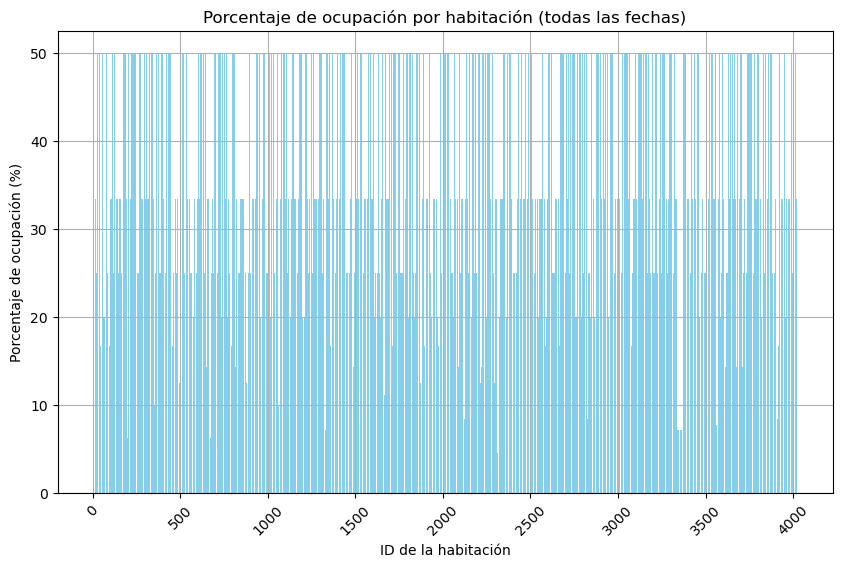